In [1]:
import numpy as np
import pandas as pd
from numpy import math


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset = pd.read_csv('50_startups.csv')

FileNotFoundError: [Errno 2] No such file or directory: '50_startups.csv'

In [ ]:
len(dataset)

In [ ]:
dataset.head

In [ ]:
dataset.shape

In [ ]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot for profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [ ]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot for profit with R&D spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [ ]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profits')

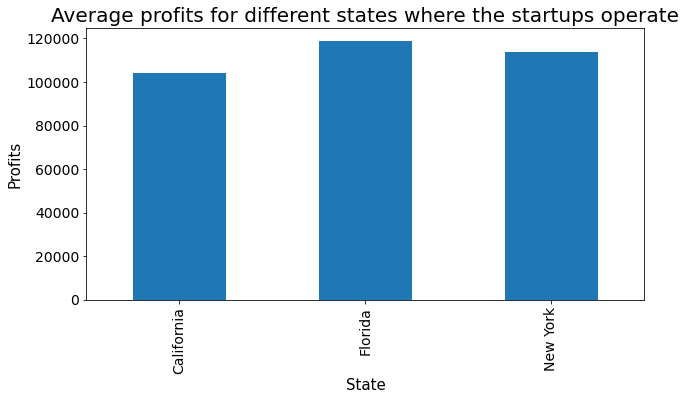

In [9]:
#Create the figure object
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize = (10,5), fontsize =14)
ax.set_title('Average profits for different states where the startups operate', fontsize = 20)
ax.set_xlabel('State', fontsize = 15)
ax.set_ylabel('Profits', fontsize = 15)


In [10]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [15]:
#creating dummy variabes forthe datasets
dataset['NewYork_State'] = np.where(dataset['State']=='NewYork',1,0)
dataset['California_State'] = np.where(dataset['State']=='California',1,0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida',1,0)
#Drop the original data frame from the datset
dataset.drop(columns=['State'],axis=1,inplace=True)



In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,0,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [18]:
dependent_variable = 'Profit'


In [19]:
#create a lis of independent variables
independent_variables = dataset.columns.tolist()

In [22]:
independent_variables.remove(dependent_variable)

In [23]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [25]:
#create a data for independent varibales
x = dataset[independent_variables].values
y = dataset[dependent_variable].values


In [26]:
#splitting the data set into the training set and the test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [27]:
#Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [28]:
x_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 0.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 0.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 0.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 0.        , 0.        ,
        0.        ]])

In [29]:
#fitting multiple linear regression to the training set

regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
#predicting the test set results
y_pred = regressor.predict(x_test)

In [31]:
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794944

In [32]:
r2_score(y_test,y_pred)

0.9347068473282425